# Import librairies

In [30]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from datetime import datetime, timedelta

# Loading DATA from yfinance


In [31]:
end_date = datetime.now()
start_date = end_date - timedelta(days=700)

cac40 = yf.download('^FCHI', start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [32]:
print(cac40)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-10-31  6279.700195  6293.149902  6244.080078  6266.770020  6266.770020   
2022-11-01  6329.759766  6383.700195  6306.049805  6328.250000  6328.250000   
2022-11-02  6351.310059  6376.290039  6273.549805  6276.879883  6276.879883   
2022-11-03  6209.629883  6245.689941  6191.729980  6243.279785  6243.279785   
2022-11-04  6291.390137  6466.319824  6289.069824  6416.439941  6416.439941   
...                 ...          ...          ...          ...          ...   
2024-09-23  7499.919922  7518.770020  7456.439941  7508.080078  7508.080078   
2024-09-24  7608.470215  7634.229980  7575.359863  7604.009766  7604.009766   
2024-09-25  7549.259766  7595.770020  7546.859863  7565.620117  7565.620117   
2024-09-26  7663.029785  7742.089844  7652.609863  7742.089844  7742.089844   
2024-09-27  7762.450195  7804.640137  7743.879883  7

# Plot of the closing price


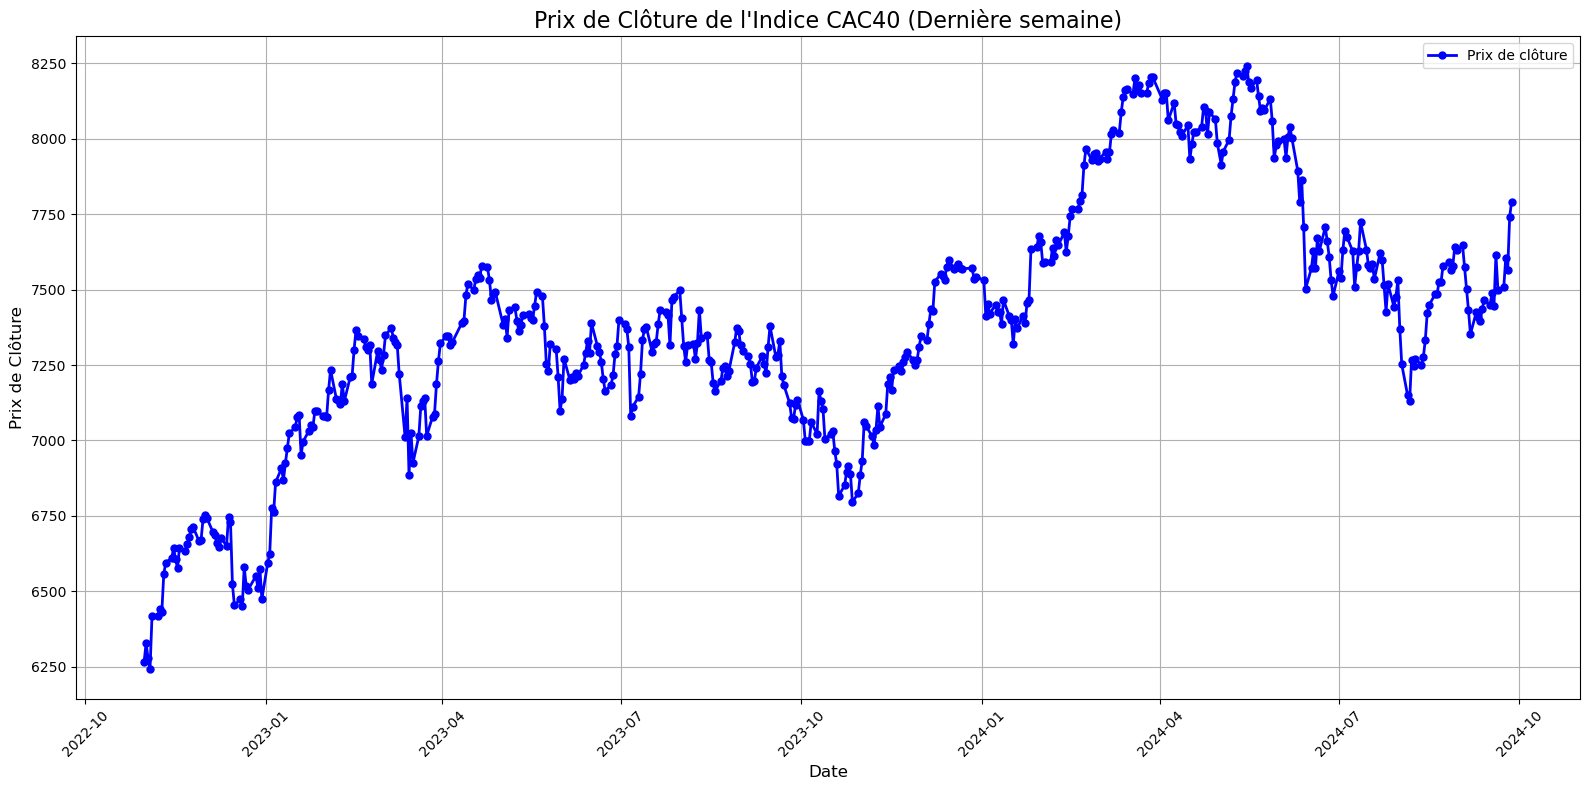

In [33]:
plt.figure(figsize=(16, 8))
plt.plot(cac40.index, cac40['Close'], marker='o', color='b', linestyle='-', linewidth=2, markersize=5, label="Prix de clôture")


plt.title("Prix de Clôture de l'Indice CAC40 (Dernière semaine)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Prix de Clôture", fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()


plt.tight_layout()
plt.show()

In [34]:
def calculate_cumulative_returns(signals):
    signals['returns'] = signals['price'].pct_change()
    signals['strategy_returns'] = signals['signal'].shift(1) * signals['returns']
    signals['cumulative_returns'] = (1 + signals['strategy_returns']).cumprod()
    return signals

In [45]:
def SMA_strategy(data, short_window=50, long_window=200):
    
    signals = pd.DataFrame(index=data.index)
    
    signals['price'] = data['Close']
    
    signals['short_mavg'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    
    signals['long_mavg'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    
    signals['signal'] = 0.0

    signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)
 
    signals['positions'] = signals['signal'].diff()
    
    signals = calculate_cumulative_returns(signals)
     
    plt.figure(figsize=(12, 8))
    
    plt.plot(signals['price'], label='CAC40 Price', color='black')
    
    plt.plot(signals['short_mavg'], label=f'{short_window}-day SMA', color='blue')
    
    plt.plot(signals['long_mavg'], label=f'{long_window}-day SMA', color='red')
    
    plt.plot(signals[signals['positions'] == 1.0].index, signals['short_mavg'][signals['positions'] == 1.0], '^', markersize=10, color='g', label='Buy Signal')
    
    plt.plot(signals[signals['positions'] == -1.0].index, signals['short_mavg'][signals['positions'] == -1.0], 'v', markersize=10, color='r', label='Sell Signal')
    
    plt.title('Simple Moving Average Strategy')
    
    plt.legend()
    
    plt.tight_layout()
        

    plt.show()
    
    plt.figure(figsize=(12, 8))
    
    plt.plot(signals['cumulative_returns'], label='Cumulative Returns', color='blue')
    
    plt.title('Cumulative Returns - Simple Moving Average Strategy')
    
    plt.legend()
    
    plt.show()
    
    
    return signals

# SMA Strategy 

C:\Users\X280\AppData\Local\Temp\ipykernel_9248\1061401414.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)

                  price   short_mavg    long_mavg  signal
Date                                                     
2022-10-31  6266.770020  6266.770020  6266.770020     0.0
2022-11-01  6328.250000  6297.510010  6297.510010     0.0
2022-11-02  6276.879883  6290.633301  6290.633301     0.0
2022-11-03  6243.279785  6278.794922  6278.794922     0.0
2022-11-04  6416.439941  6306.323926  6306.323926     0.0
...                 ...          ...          ...     ...
2024-09-23  7508.080078  7461.247793  7731.969690     0.0
2024-09-24  7604.009766  7461.727393  7732.232090     0.0
2024-09-25  7565.620117  7461.623594  7732.342441     0.0
2024-09-26  7742.089844  7464.734395  7733.396790     0.0
2024-09-27  7791.790039  7469.879795  7734.476489     0.0

[490 rows x 4 columns]


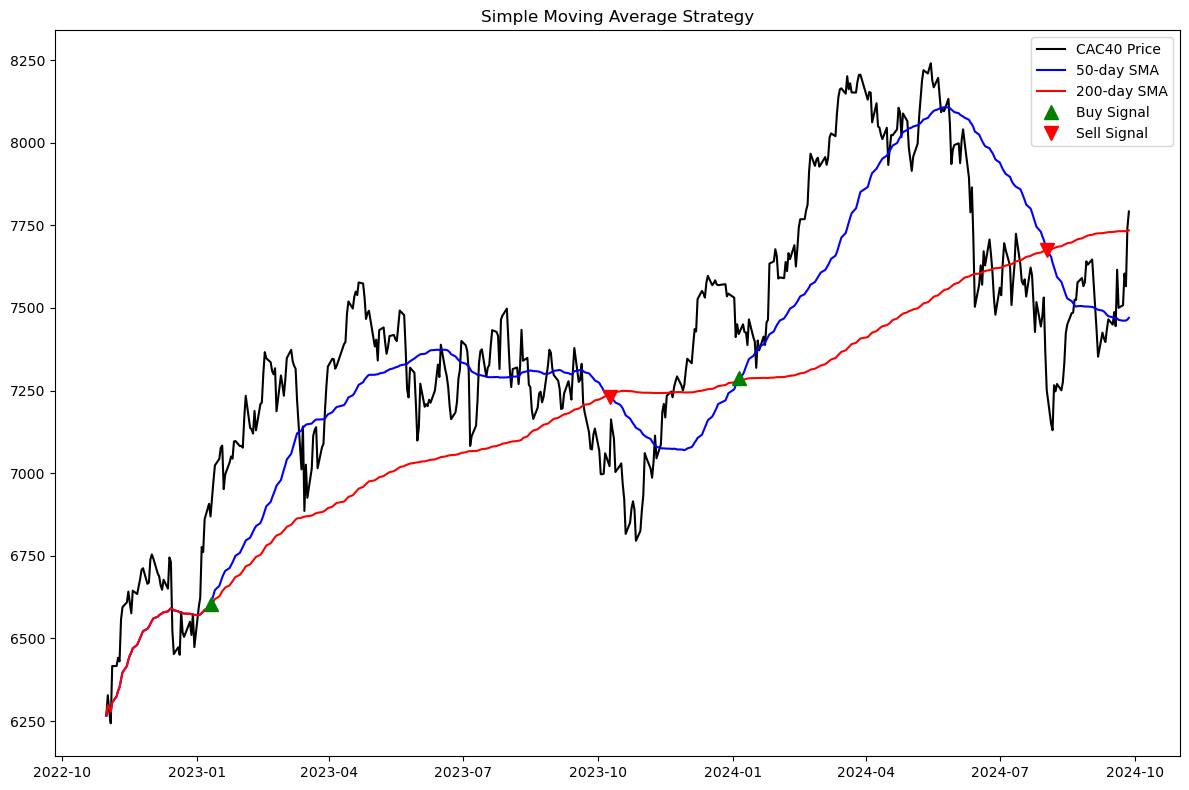

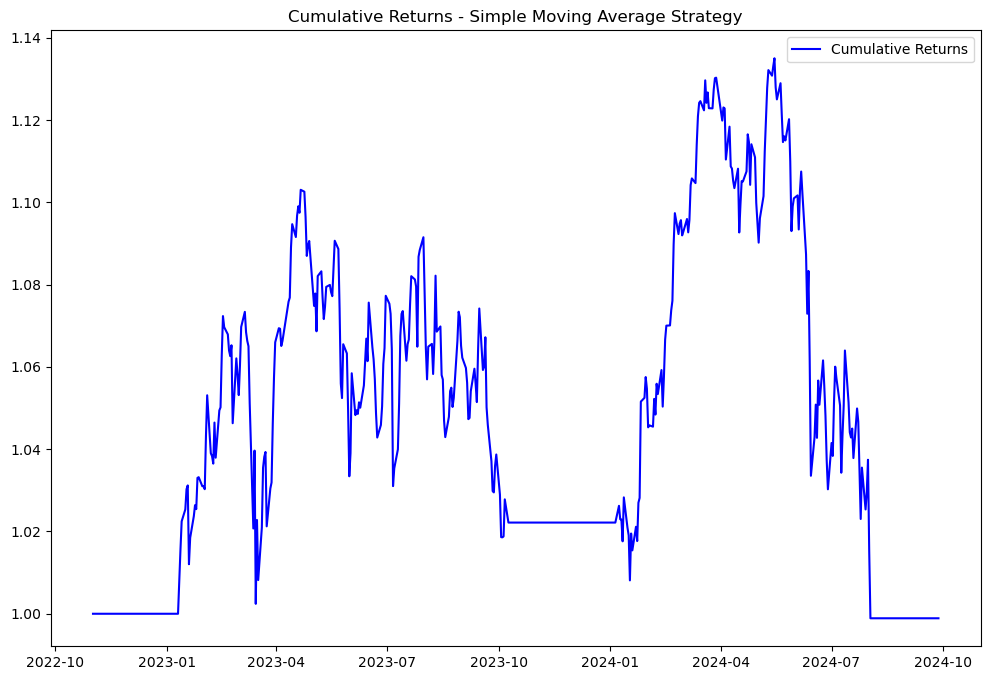

,price,short_mavg,long_mavg,signal,positions,returns,strategy_returns,cumulative_returns
Date,,,,,,,,
2022-10-31,6266.770020,6266.770020,6266.770020,0.0,NaN,NaN,NaN,NaN
2022-11-01,6328.250000,6297.510010,6297.510010,0.0,0.0,0.009810,0.0,1.000000
2022-11-02,6276.879883,6290.633301,6290.633301,0.0,0.0,-0.008118,-0.0,1.000000
2022-11-03,6243.279785,6278.794922,6278.794922,0.0,0.0,-0.005353,-0.0,1.000000
2022-11-04,6416.439941,6306.323926,6306.323926,0.0,0.0,0.027735,0.0,1.000000
...,...,...,...,...,...,...,...,...
2024-09-23,7508.080078,7461.247793,7731.969690,0.0,0.0,0.001043,0.0,0.998902
2024-09-24,7604.009766,7461.727393,7732.232090,0.0,0.0,0.012777,0.0,0.998902
2024-09-25,7565.620117,7461.623594,7732.342441,0.0,0.0,-0.005049,-0.0,0.998902


In [46]:
%matplotlib inline
SMA_strategy(cac40)